In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.stats.api as sms
import scipy.stats as st
import random

df = pd.read_csv('../data/county_election_results.csv')
df['pct_D'] = (df['votes_D_2020'] / df['votes_total_2020']) * 100
df['pct_R'] = (df['votes_R_2020'] / df['votes_total_2020']) * 100

**1.** Elija dos estados de EEUU y compare la distribución de votos republicanos y demócratas a través de estadísticas descriptivas. Elabore también un gráfico de caja, y comente sobre las similitudes y diferencias que puede inferir a partir del análisis exploratorio gráfico y cuantitativo.<br>

### Selección de los estados con mayor votación por cada uno de los estados

La idea inicial para seleccionar dos estados, para realizar una descripción de su proceso de votación, es seleccionar los dos estados con mayor votación por cada uno de los partidos 

In [2]:
group = df.groupby('state')[['pct_D', 'pct_R']].mean()

def state_info(state, label):
    print(f'Info sobre {state}, {label}')
    print("\t Porcentaje medio de voto demócrata {:.3f}".format(group['pct_D'][state]))
    print("\t Porcentaje medio de voto republicano {:.3f}".format(group['pct_R'][state]))
    print(f"\t Cantidad de condados {len(df[df['state'] == state])}")    
    print(f"\t Población votante  {df[df['state'] == state]['votes_total_2020'].sum()}")    
    print('-------------------------------------------------------------------------------\n')

state_more_d = group['pct_D'].idxmax()
state_more_r = group['pct_R'].idxmax()


state_info(state_more_d, 'estado con mayor votación demócrata')
state_info(state_more_r, 'estado con mayor votación republicano')

Info sobre DC, estado con mayor votación demócrata
	 Porcentaje medio de voto demócrata 93.230
	 Porcentaje medio de voto republicano 5.461
	 Cantidad de condados 1
	 Población votante  340364
-------------------------------------------------------------------------------

Info sobre NE, estado con mayor votación republicano
	 Porcentaje medio de voto demócrata 19.888
	 Porcentaje medio de voto republicano 78.285
	 Cantidad de condados 93
	 Población votante  951712
-------------------------------------------------------------------------------



De este primer análisis es interesante señalar la diferencia entre el estado con mayor votación demócrata y el de mayor votación republicana en cuanto la cantidad de condados. Mientras que el primero unicamente esta compuesto por un condados, el segundo cuenta con 93 de estos.

De igual manera resalta las diferencias en cuanto a la población votante de cada estado, donde se aprecia una diferencia aproximada de 1/3 entre el estado con mayor votación demócrata y el de mayor votación republicana.

Finalmente, también se puede apreciar como el dominio republicano en si estado mas representativo no es tan dominante con un 78% de votos al partido como lo es el partido demócrata en si estado más representativo con un 93% de votación. Dicha diferencia a priori se puede considerar un efecto lógico de las diferencias en cuanto a la población de cada estado, pues es natural que en el estado con mayor población y mayor cantidad de estados existan mayor variedad de ideologías  

Basados en las reflexiones anteriores, para seleccionar otra representación del partido demócrata que tenga más condados pasamos a hacer un análisis poblacional y geográfico de los estados demócratas y republicanos

/var/folders/g_/0lqz2qlx7cx96d901w35swh40000gn/T/ipykernel_30076/1285675059.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(r_states, rotation=90)


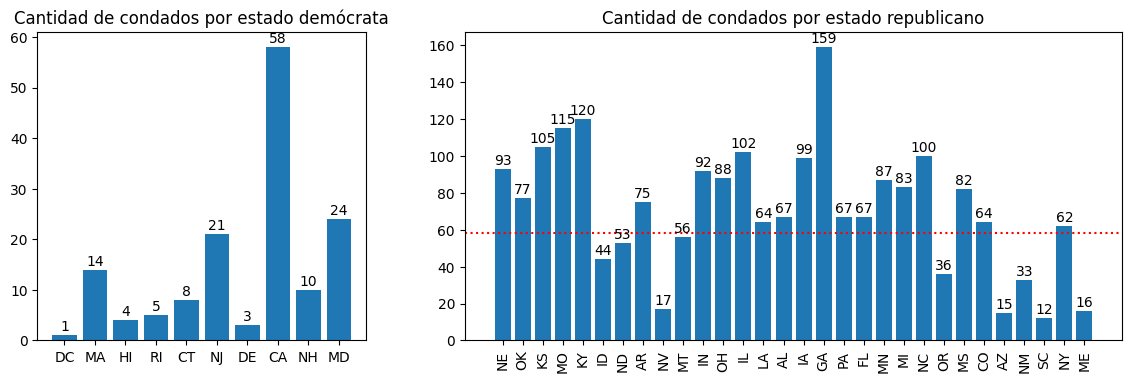

In [3]:
"""Análisis de la distribución de los estados entre los partidos y su cantidad de condados"""

fig, ax = plt.subplots(nrows=1, ncols=2,  figsize=(14,4), width_ratios=[1,2])

d_states = group[group['pct_D'] > 50]['pct_D'].sort_values(ascending=False).index
info = [len(df[df['state'] == s]) for s in d_states]
d_max = max(info) 
rects = ax[0].bar(d_states, info)
ax[0].bar_label(rects, padding=1)
ax[0].set_title('Cantidad de condados por estado demócrata')

r_states = group[group['pct_D'] < 50]['pct_R'].sort_values(ascending=False).index
info = [len(df[df['state'] == s]) for s in r_states]
rects = ax[1].bar(r_states, info)
ax[1].bar_label(rects, padding=1)
ax[1].set_xticklabels(r_states, rotation=90) 
ax[1].axhline(y=d_max, ls=':',color='red') # marcamos la máxima cantidad de estados demócratas como referencia 
ax[1].set_title('Cantidad de condados por estado republicano')

plt.show()

En esta gráficas podemos observar como la tendencia de votación demócrata es más alta en estados con pocos condados relativamente. El estado con mayor cantidad de condados entre los estados demócratas es CA con 58 condados, valor que es un valor extraño dentro del conjunto. El mismo valor es el que se representa dentro de la gráfica de los estados republicanos donde se puede ver que en general la mayoría de los estados demócratas tiene más condados que CA.

/var/folders/g_/0lqz2qlx7cx96d901w35swh40000gn/T/ipykernel_30076/3892702707.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(r_states, rotation=90)


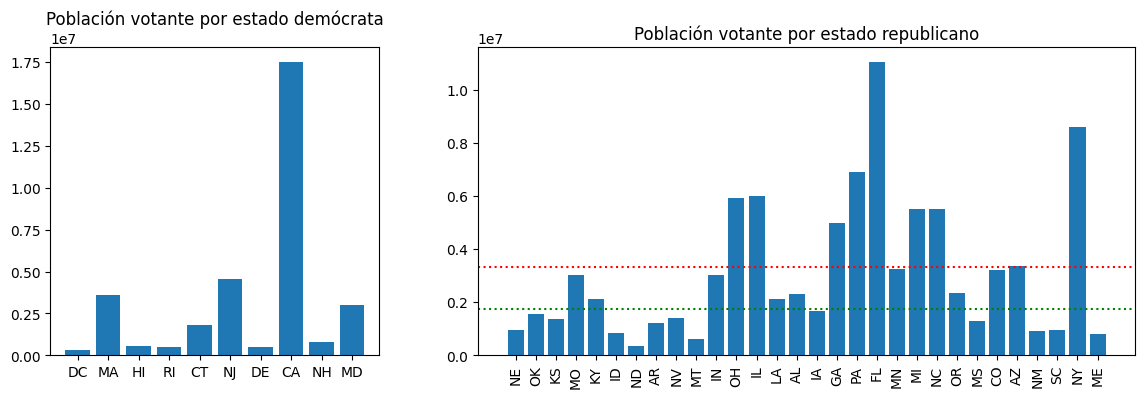

In [4]:
"""Análisis de la distribución de los estados entre los partidos y su de población votante"""


fig, ax = plt.subplots(nrows=1, ncols=2,  figsize=(14,4), width_ratios=[1,2])


info = [df[df['state'] == s]['votes_total_2020'].sum() for s in d_states]
d_max_without_ca = np.mean(info[0:7] + info[8:])
d_max = np.mean(info)
rects = ax[0].bar(d_states, info)
ax[0].set_title('Población votante por estado demócrata')



info = [df[df['state'] == s]['votes_total_2020'].sum() for s in r_states]
rects = ax[1].bar(r_states, info)
ax[1].axhline(y=d_max, ls=':',color='red') # marcamos la media poblacional de estados demócratas como referencia 
ax[1].axhline(y=d_max_without_ca, ls=':',color='green') # marcamos la media poblacional de estados demócratas como referencia 
ax[1].set_xticklabels(r_states, rotation=90)
ax[1].set_title('Población votante por estado republicano')

plt.show()

Luego con respecto a la distribución poblacional de los estados no se puede decir mucho, pues aunque las referencias de las medias con y si el estado CA dentro de la gráfica de los estados republicanos parece descriptiva, la distribución poblacional de los estados demócratas distribuye sus valores en los extremos con una distribución uniforme en cada extremo por lo que la media es una medida irreal del comportamiento de este conjunto

Luego analizamos la información de los estados con mayor cantidad de condados dentro del grupo de los estados demócratas para elegir otro representante

In [5]:
state_info('MA', 'Segundo estado con mayor votación demócrata')
state_info('NJ', 'Sexto estado con mayor votación demócrata')
state_info('CA', 'Octavo estado con mayor votación demócrata')

Info sobre MA, Segundo estado con mayor votación demócrata
	 Porcentaje medio de voto demócrata 67.129
	 Porcentaje medio de voto republicano 31.004
	 Cantidad de condados 14
	 Población votante  3615075
-------------------------------------------------------------------------------

Info sobre NJ, Sexto estado con mayor votación demócrata
	 Porcentaje medio de voto demócrata 54.729
	 Porcentaje medio de voto republicano 43.987
	 Cantidad de condados 21
	 Población votante  4545815
-------------------------------------------------------------------------------

Info sobre CA, Octavo estado con mayor votación demócrata
	 Porcentaje medio de voto demócrata 53.707
	 Porcentaje medio de voto republicano 43.939
	 Cantidad de condados 58
	 Población votante  17496800
-------------------------------------------------------------------------------



Seleccionamos el segundo estado con mayor votación demócrata pues la diferencia de votación de las otras dos opciones no es del todo representativa

In [6]:
states = [d_states[1], state_more_r]
df_states = df[df['state'].isin(states)]
states

['MA', 'NE']

### Análisis de la distribución de los votos entre los estados seleccionados

Utilizamos una gráfica de caja para visualizar la distribución de los porcentaje de votación dentro de los estados seleccionados 

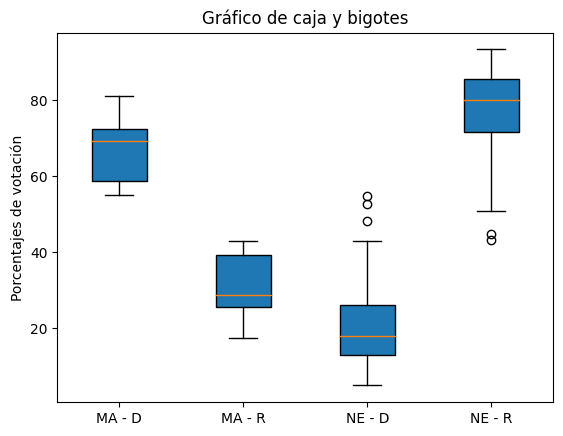

In [7]:
# Creación de la figura y los ejes
fig, ax = plt.subplots()

# Creación del gráfico de cajas
box_data = [
    df[df['state'] == states[0]]['pct_D'], 
    df[df['state'] == states[0]]['pct_R'], 
    df[df['state'] == states[1]]['pct_D'], 
    df[df['state'] == states[1]]['pct_R'], 
]

labels = [states[0] + ' - D',  states[0] + ' - R', states[1] + ' - D', states[1] + ' - R']
bplot = ax.boxplot(box_data, labels=labels, vert=True, patch_artist=True)



ax.set_title('Gráfico de caja y bigotes')
ax.set_ylabel('Porcentajes de votación')

# Mostrar el gráfico
plt.show()


En esta gráfica se puede ver como dentro del segundo estado con mayor votación demócrata la distribución es bastante predecible, la mediana del porcentaje de votación demócrata es próxima al 3er cuartil alrededor del 70% de votación, no hay valores atípicos y el mínimo de los valores no atípicos se encuentra próximo al 1er cuartil. Mientras que las distribución de votación republicana describe, obviamente, todo lo contrario. En este casos la información mas relevante es que no existen valores atípicos. En conclusion se nota la tendencia de los datos hacia los partidos demócratas  

Por otro lado, nótese también la influencia de las diferencias en cuanto a cantidad de condados entre los estados seleccionados. Mientras que el segundo estado con mayor votación demócrata presenta una distribución homogénea y de cierta manera centrada. El estado con mayor votación republicana presenta un mayor rango de valores dentro de los datos e incluso muestra valores atípicos tanto en la votación demócrata como republicana. 

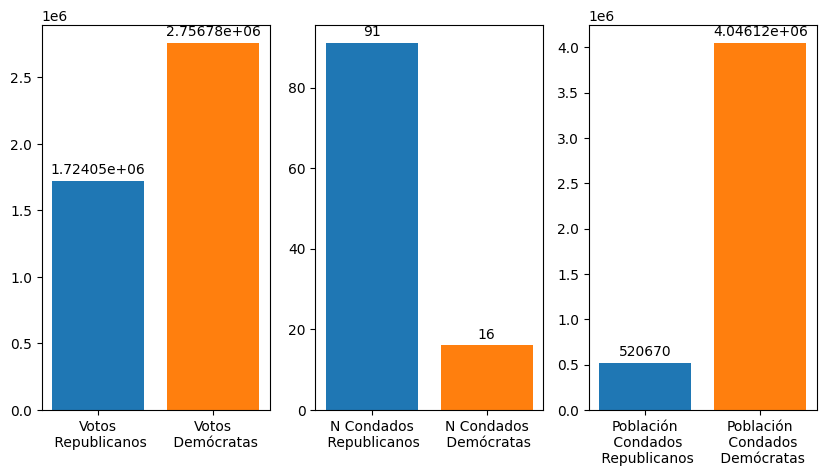

In [8]:
"""Análisis de la distribución poblacional de los estados seleccionados"""

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

bar_colors = ['tab:blue', 'tab:orange']

labels = 'Votos\n Republicanos', 'Votos\n Demócratas'
sizes = [df_states['votes_R_2020'].sum(), df_states['votes_D_2020'].sum()]

rects = ax1.bar(labels, sizes, color=bar_colors)
ax1.bar_label(rects, padding=3)

county_r = df_states[df_states['pct_R'] > 50]
county_d = df_states[df_states['pct_D'] > 50]

labels = 'N Condados\n Republicanos', 'N Condados\n Demócratas'
sizes = [len(county_r), len(county_d)]

rects = ax2.bar(labels, sizes, color=bar_colors)
ax2.bar_label(rects, padding=3)

labels = 'Población\n Condados\n Republicanos', 'Población\n Condados\n Demócratas'
sizes = [county_r['votes_total_2020'].sum(), county_d['votes_total_2020'].sum()]

rects = ax3.bar(labels, sizes, color=bar_colors)
_ = ax3.bar_label(rects, padding=3)


Dado que el numero de condados y la población de estos fueron parte fundamental de la selección de los estados, terminamos este ejercicio con una descripción de la distribución poblacional de estos dos estados.

Quizás esta imagen sea una buena descripción de la estrategia del partido demócrata para ganar estas elecciones. El partido demócrata ganó las elecciones ganando en menos estados que el partido republicano. Y como ya vimos en general esos estados tiene menos condados que el resto en donde ganaron los republicanos.

Pero en esta gráfica vemos la comparación entre los dos estados seleccionados donde podemos ver que pese a que los democratas ganaron solo en 16 condados frente a los 91 de los republicanos. Los demócratas recibieron aproximadamente 1 000 000 votos más que los republicanos. Y la población de los 16 condados demócratas es mucho mayor a la población de los 91 condados republicanos 

----

----

**2.** A partir de los datos entregados, estudie la posible correlación entre la fracción de votos republicanos (o demócratas) y alguna otras de las variables incluidas en la base de datos. Puede trabajar con todos los estados, o con alguna selección de ellos. Para este estudio, se requiere:<br>

a) Explorar y proponer una posible correlación o relación analítica entre variables.<br>
b) Plantear una hipótesis que refleje esta correlación.<br>
c) Diseñar y realizar el test de hipótesis.<br>
d) Concluir acerca de la validez y significancia de la correlación identificada.<br>

### Análisis de los datos para la conformación de hipótesis

In [9]:
columns = [
    'FIPS', 'eevp', 'D_winner', 
    'pct_D', 'pct_R', 'Unemployment Rate', 
    'Unemployment', 'Employment', 'Labor Force', 
    'acs_pct_pop_nonwhite', 'acs_pct_management', 
    'acs_pct_service', 'pct_pop25+_bachelor_higher',
    'median_household_income', 'per_capita_income', 'deaths',
    # 'deaths_per_thousand', 'deaths_percap_pctile', 'cases'
]

df['D_winner'] = df['winner'].map({'R': 0, 'D': 1})
df[columns]

,FIPS,eevp,D_winner,pct_D,pct_R,Unemployment Rate,Unemployment,Employment,Labor Force,acs_pct_pop_nonwhite,acs_pct_management,acs_pct_service,pct_pop25+_bachelor_higher,median_household_income,per_capita_income,deaths
0,1061,100,0,12.726402,86.555493,3.9,428.0,10519.0,10947.0,16.065834,25.1,16.0,11.1,38142.0,20471.0,7
1,1021,100,0,15.937970,83.424096,4.7,925.0,18628.0,19553.0,19.861143,24.3,13.3,14.2,45182.0,24611.0,31
2,1049,100,0,14.611919,84.534781,3.8,1225.0,31427.0,32652.0,19.324438,23.2,15.8,12.7,39233.0,21004.0,26
3,1093,100,0,10.614525,88.551114,4.2,584.0,13221.0,13805.0,8.029368,26.0,14.2,13.1,35392.0,21391.0,29
4,1059,100,0,16.597708,82.558880,3.6,557.0,14706.0,15263.0,22.918648,23.7,13.9,12.9,40459.0,19776.0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,45083,100,0,35.603242,62.937674,7.0,10973.0,145208.0,156181.0,31.409851,31.0,15.7,23.8,50179.0,26072.0,211
2294,45021,100,0,27.633558,71.400871,8.3,2199.0,24246.0,26445.0,27.081166,22.8,15.1,13.8,35836.0,21432.0,48
2295,45051,100,0,32.924604,66.105684,8.2,12334.0,137231.0,149565.0,22.831279,28.2,25.1,23.6,48279.0,26917.0,207
2296,45089,100,0,64.366594,34.607444,9.4,1189.0,11429.0,12618.0,68.795999,23.7,21.2,12.7,32351.0,18454.0,46


Por cada uno de los estados se analiza la tabla de correlación del porcentaje de votación demócrata con respecto al resto de las columnas seleccionadas. En cada casos se intenta detectar altos valores de correlación 

In [10]:
states = df['state'].drop_duplicates()

In [11]:
result = []
for i, s1 in enumerate(states):
    for j, s2 in enumerate(states):
        if s1 == s2: continue
        tem_df = df[df['state'].isin([s1, s2])] 
        corr_matrix = tem_df[columns].corr()
        
        corr_var = corr_matrix['pct_D'].drop('pct_D')
        key = corr_var.idxmax()

        result.append((s1, s2, key, corr_var[key])) 

result = pd.DataFrame({'s1': s1, 's2': s2, 'field': field, 'value': value} for s1, s2, field, value in result)
result = result[result['value'] > 0.9]
result

,s1,s2,field,value
0,AL,AR,acs_pct_pop_nonwhite,0.928995
1,AL,AZ,acs_pct_pop_nonwhite,0.940924
5,AL,DC,acs_pct_pop_nonwhite,0.961932
6,AL,DE,acs_pct_pop_nonwhite,0.954525
8,AL,GA,acs_pct_pop_nonwhite,0.923918
...,...,...,...,...
1502,RI,ME,pct_pop25+_bachelor_higher,0.904483
1521,SC,AL,acs_pct_pop_nonwhite,0.970016
1531,SC,HI,acs_pct_pop_nonwhite,0.930047
1538,SC,LA,acs_pct_pop_nonwhite,0.928801


In [12]:
result.groupby('field').count().sort_values('value')

,s1,s2,value
field,,,
D_winner,2,2,2
deaths,2,2,2
median_household_income,2,2,2
per_capita_income,2,2,2
pct_pop25+_bachelor_higher,4,4,4
acs_pct_pop_nonwhite,70,70,70


La columna `acs_pct_pop_nonwhite` hace referencia al porcentaje de población no blanca según la encuesta anual de la comunidad estadounidense (ACS, por sus siglas en inglés). Esta encuesta es realizada por la Oficina del Censo de los Estados Unidos y recopila información detallada sobre la población y la vivienda en los Estados Unidos. 

De los 40 estados de EEUU hay 19 estados distintos en los que los datos muestras
una alta correlación entre el porcentaje de voto demócrata
y su porcentaje de poblacion no blanca segun el ACS


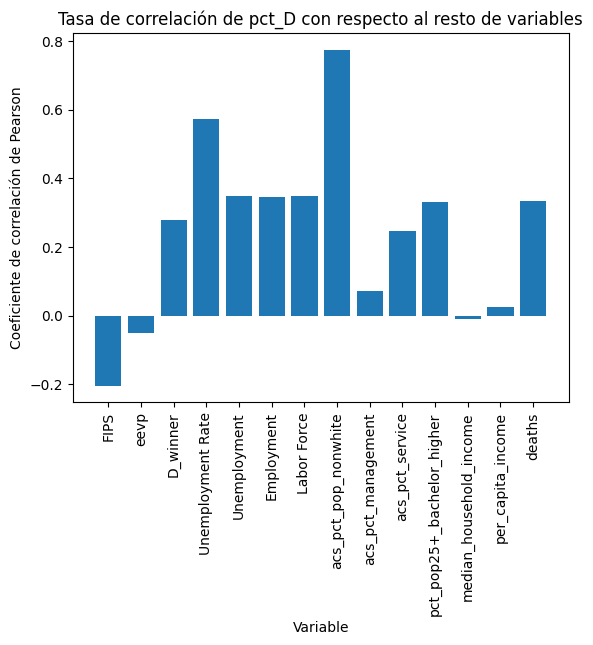

In [13]:
corr_state = result[result['field'] == 'acs_pct_pop_nonwhite']
corr_state = corr_state.sort_values('value', ascending=False)
corr_state = corr_state['s1'].drop_duplicates()

print(
f"""De los {len(states)} estados de EEUU hay {len(corr_state)} estados distintos en los que los datos muestras
una alta correlación entre el porcentaje de voto demócrata
y su porcentaje de poblacion no blanca segun el ACS"""
)


corr_df = df[df['state'].isin(corr_state)][columns]
corr_matrix = corr_df.corr()
corr_var = corr_matrix['pct_D'].drop(['pct_D', 'pct_R'])


plt.bar(corr_var.index, corr_var.values)
plt.title(f'Tasa de correlación de pct_D con respecto al resto de variables')
plt.xlabel('Variable')
plt.ylabel('Coeficiente de correlación de Pearson')
plt.xticks(rotation=90)
plt.show()

Covarianza: 253.6134812181926
Pearson: 0.7754962897017232


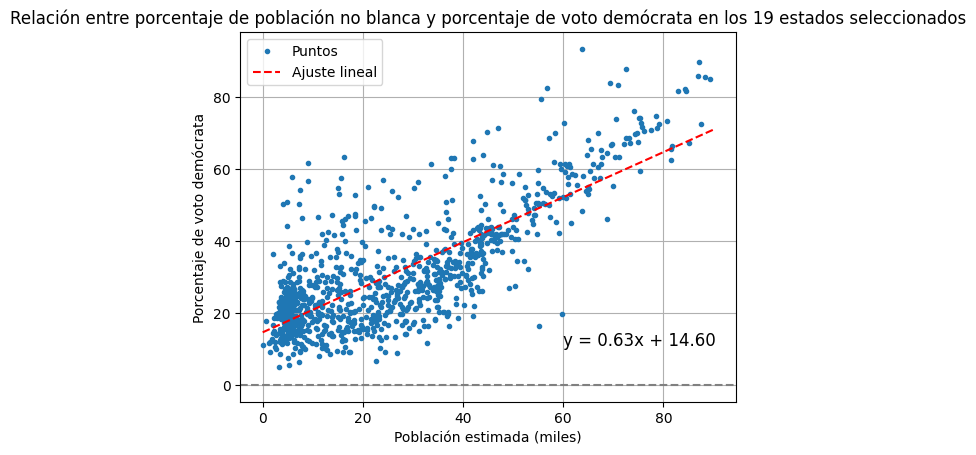

In [14]:
x = corr_df['acs_pct_pop_nonwhite']
y = corr_df['pct_D']

cov = np.cov(x,y)
print('Covarianza:', cov[0,1])

pearson = np.corrcoef(x,y)
print('Pearson:', pearson[0,1])

a, b = np.polyfit(x, y, 1)
xf = np.arange(0, 100, 10)
yf = a * xf + b
plt.plot(x, y, '.', label='Puntos')
plt.plot(xf, yf, '--', color='red', label='Ajuste lineal')

# Título, leyenda y etiquetas de los ejes
plt.title('Relación entre porcentaje de población no blanca y porcentaje de voto demócrata en los 19 estados seleccionados')
plt.xlabel('Población estimada (miles)')
plt.ylabel('Porcentaje de voto demócrata')
plt.legend()

# Coeficiente de correlación
# plt.text(700, 10, f'Coeficiente de correlación: {pearson[0,1]:.2f}', fontsize=12, ha='left', va='bottom')
plt.axhline(y=0, color='gray', linestyle='--')

# Ecuación de la recta
plt.text(60, 10, f'y = {a:.2f}x + {b:.2f}', fontsize=12, ha='left', va='bottom')

# Cuadrícula de fondo
plt.grid(True)

# Mostrar el gráfico
plt.show()

Por tanto parece existir una relación "lineal" el porcentaje de votación demócrata y la población no blanca en cada uno de los estados 

#### Hipótesis y análisis gráfico y estadístico                

**Hipótesis**: El porcentaje de población no blanca tiene una relación lineal con el porcentaje de votación demócrata de los condados 

Lo que significaría que al permutar los valores de la columna 'acs_pct_pop_nonwhite' la distribución de los votos de estos condados será aproximadamente similar a los datos sin perturbar 

nonwhite, media:58.07, mediana:58.38, std:14.50, len:233
white, media:31.15, mediana:28.83, std:13.48, len:2065


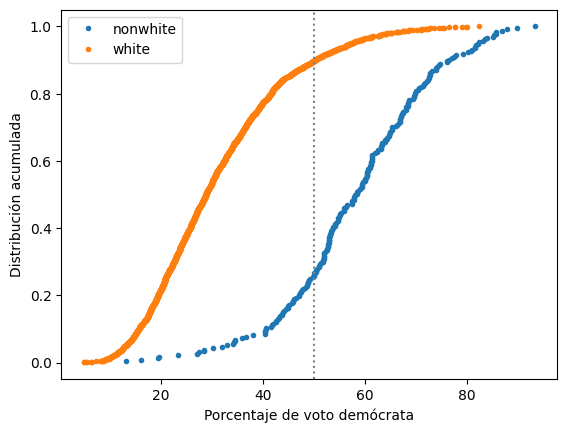

In [15]:
"""
Análisis de la distribución de los porcentaje de votación demócratas 
Entre los condados con mayor y menor población no blanca
"""

counties_nonwhite = df[df['acs_pct_pop_nonwhite'] > 50]
counties_white = df[df['acs_pct_pop_nonwhite'] <= 50]

def fdae(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,len(x)+1)/len(x)
    return(x,y)

dataset =[('nonwhite',counties_nonwhite), ('white',counties_white)]

for name, dats in dataset:
    x,y=fdae(dats['pct_D'])
    plt.plot(x,y,marker='.',ls='none',label=name)
    plt.legend()
    
    print('%s, media:%.2f, mediana:%.2f, std:%.2f, len:%.d'%(
        name, dats['pct_D'].mean(), dats['pct_D'].median(),
        dats['pct_D'].std(), len(dats['pct_D'])
        )
    )
    

plt.xlabel('Porcentaje de voto demócrata')
plt.ylabel('Distribución acumulada')
_= plt.axvline(x=50,ls=':',color='gray')


En esta gráfica se ve claramente como la segmentación de los datos según la información de la población no blanca de los condados es altamente descriptiva. Mientras que los condados con menor representación de población no blanca muestran un tendencia alejada de los partidos demócratas, los condados com mayor representación de población no blanca son mas propensos a votar por los partidos demócratas

Haciendo referencia a las gráficas vistas durante el taller, la distribución de la probabilidad acumulada de los condados con menor representación no blanca es semejante a la distribución total del dataset  

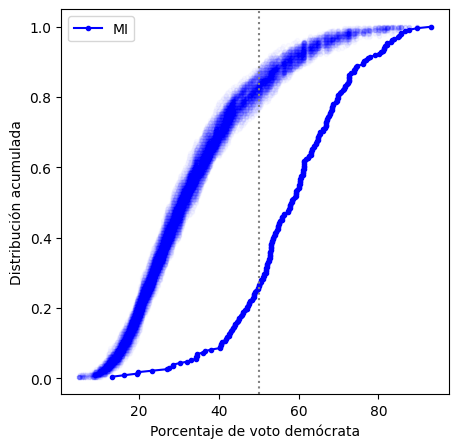

In [16]:
"""
Análisis de la distribución de los porcentaje de votación demócratas 
Mediante la generación demuestras permutando la columna de la información de la población no blanca.
"""

def permutation_sample(data1):

    #datos concatenados
    data = data1.copy()

    # permutacion
    data['acs_pct_pop_nonwhite'] = np.random.permutation(data['acs_pct_pop_nonwhite'].values)

    #Dada una permutation de las informaciones raciales del dataset 
    #Se selecciona los nuevos condados con mayor población no blanca
    #De esta manera permutamos las tuplas (acs_pct_pop_nonwhite, pct_D)  
    return data[data['acs_pct_pop_nonwhite'] > 50]



#generamos n permutaciones
nperm=100
plt.figure(figsize=(5,5))
for n in range(nperm):
    perm = permutation_sample(df)
    x, y = fdae(perm['pct_D'])
    plt.plot(x,y,marker='.',ls='none',color='blue',alpha=0.02)


#graficamos las distribuciones originales de cada estado
x, y = fdae(counties_nonwhite['pct_D'])
plt.plot(x,y,marker='.',ls='-',label='MI',color='blue')

plt.legend()

plt.xlabel('Porcentaje de voto demócrata')
plt.ylabel('Distribución acumulada')
plt.axvline(x=50,ls=':',color='gray')
plt.show()                                                                                                        

Otra evidencia gráfica de que la relación entre el porcentaje de votación demócrata y el porcentaje de población non blanca en los condados es determinante. Pues la perturbar esta información mendicante los métodos de la permutation se puede distinguir claramente la información real de los generados.   

#### Test de Hipótesis 

$H_0$: La población no blanca de los distintos condados no afecta a al porcentaje medio de las votaciones demócratas  \
$H_1$: Mientras mayor es población no blanca de los distintos condados mayor es el porcentaje medio de las votaciones demócratas

Media de votación de los estados con mayor población no blanca: 58.07
valor-p = 0.0


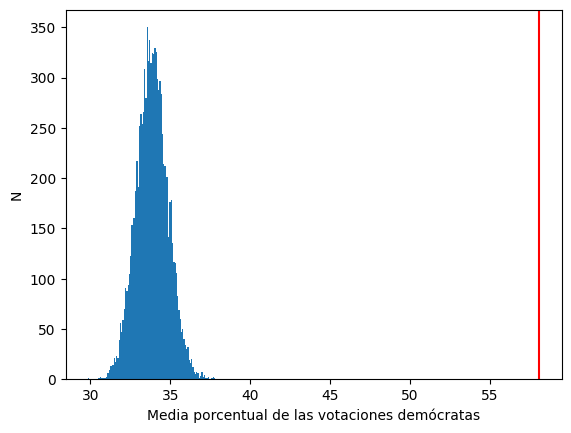

In [17]:
#observaciones (MI-WI)
real_mean = counties_nonwhite['pct_D'].mean()

print(r'Media de votación de los estados con mayor población no blanca: %.2f'% real_mean)

size=10000

perm_replicates = np.empty(size)
for i in range(size):
    perm_sample_1 = permutation_sample(df)
    perm_replicates[i] = perm_sample_1['pct_D'].mean()


# Cantidad de simulaciones en los que: 
# La permutación de la información de la población no blanca de los condados
# Aumenta la media porcentual de las votaciones por el partido demócrata  
p_count = np.sum(perm_replicates >= real_mean)
#valor-p
pval = p_count / size
print('valor-p =', pval)

plt.hist(perm_replicates, bins=100)
plt.axvline(x=real_mean, color='r', label='Observed difference')
plt.xlabel('Media porcentual de las votaciones demócratas')
plt.ylabel('N')
plt.show()

#### Se rechaza la hipótesis nula, por tanto queda demostrado que a mayor porcentaje de población no blanca mayor es el porcentaje de votación del condado por el partido demócrata. 


----

----

**3.** Imagine que ud. trabaja en una empresa de e-commerce, que está testeando un nuevo diseño de página web. El objetivo es lograr un aumento en la tasa de conversión (porcentaje de usuarios que realiza una compra) de al menos un 2%.

Para el testeo, se diseña un experimento en base a dos grupos:

> Grupo control (A): se les muestra la página original.

> Grupo de tratamiento (B): se les muestra el nuevo diseño. 

Para cada grupo, se monitorea la actividad en la página web y se asigna una tasa de conversión de acuerdo a la siguiente regla: 

    0 - El usuario no compró el producto durante la sesión en la página web. 
    1 - El usuario si compró el producto durante la sesión en la página web. 

El experimento se desarrolla durante un mes, y para cada día se reporta la tasa de conversión promedio de cada grupo. Los datos están contenidos en el archivo `abtest.csv`.

Para este caso, diseñe e implemente un testeo A/B que permita determinar si el diseño de la nueva página es o no efectivo.

##### Análisis de Dataset   

In [18]:
df = pd.read_csv('../data/abtest.csv')
df.head()

,Day,Conversion_A,Conversion_B
0,1,0.15,0.19
1,2,0.12,0.20
2,3,0.18,0.18
3,4,0.19,0.22
4,5,0.17,0.19


In [19]:
conv_a = df['Conversion_A']
conv_b = df['Conversion_B']

conv_accumulate_a = conv_a.sum()
conv_accumulate_b = conv_b.sum()

print('Conversion promedio acumulada de A', conv_accumulate_a)
print('Conversion promedio de A', conv_a.mean())
print('---------------------------------------------------')
print('Conversion promedio acumulada de B {:.3f}'.format(conv_accumulate_b))
print('Conversion promedio de B {:.3f}'.format(conv_b.mean()))

Conversion promedio acumulada de A 4.86
Conversion promedio de A 0.162
---------------------------------------------------
Conversion promedio acumulada de B 5.800
Conversion promedio de B 0.193


En el promedio de los promedios de conversion de ambas muestras se detecta una diferencia de más de 0.02. Lo cual no implica que esta diferencia exista. Es necesario realizar un test de hipótesis 

In [20]:
# Para la tasa de conversion necesitaríamos el promedio de conversion
# Al no tener la cantidad de visitas por día tenemos que usar 
# El promedio de los promedios como baseline   
baseline_rate = conv_a.mean()
practical_significance = 0.02 # usamos una significances del 0.02 para demostrar la diferencia de al menos un 2% 
confidence_level = 0.05 # 95% intervalo de confianza
sensitivity = 0.8 

effect_size = sms.proportion_effectsize(baseline_rate, baseline_rate + practical_significance)
sample_size = sms.NormalIndPower().solve_power(
    effect_size = effect_size, 
    power = sensitivity, 
    alpha = confidence_level, 
    # se establece en 1 para indicar que se compara un grupo con otro grupo de tamaño igual
    ratio=1
) 

print("Required sample size: ", round(sample_size), " per group")
print("Sample size: ", conv_a.shape[0], " per group")

Required sample size:  5585  per group
Sample size:  30  per group


El análisis de dimensiones muestra que este estudio requiere de un tamaño de muestras de 5585 por grupo. Pero la información aportada solo refleja el porciento de conversion por día. Por lo tanto para realizar este estudio necesitamos construir una muestra.   

##### Construcción de la Muestra  

In [21]:
def random_subset(lst, n):
    "Choices without repetition"

    random.shuffle(lst)
    return lst[:n]

###########################
#       Asunción          #
###########################
# El número de visitas por días distribuyen de forma normal 
def random_sizes(size, days):
    "Distribution of n number of visits around a given number of days"

    splits, acc = [], 0

    while acc < size:
        sample = round(random.normalvariate(size/days, size/(days*2)))
        if sample > 0:
            acc += sample
            splits.append(sample)
    
    return splits

def sample_building(sample_len, sample_mean):
    "Generation of a daily conversion sample"

    sample = np.zeros(sample_len)
    ones = random_subset(list(range(sample_len)), round(sample_len * sample_mean))
    sample[ones] = 1
    return sample

def sample_conv_per_page(size, means):
    "Generation of a conversion sample"
    
    visitation_per_days = random_sizes(size, len(means))

    data = []
    for day in visitation_per_days:
        mean = random.choice(means) 
        sample = sample_building(day, mean)
        data.append(sample)

    return np.concatenate(data)[:size]


a_conv_data = []
b_conv_data = []
epoch = 10000
data_size = round(sample_size)


for i in range(epoch):
    a_sample = sample_conv_per_page(data_size, conv_a)
    a_conv_data.append(a_sample.sum())

    b_sample = sample_conv_per_page(data_size, conv_b)
    b_conv_data.append(b_sample.sum())

    print('Epoch {0}: A_info(sum={1:.3f}, men={2:.3f}) B_info(sum={1:.3f}, men={2:.3f})'.format(
        i, a_sample.sum(), a_sample.mean(),  b_sample.sum(), b_sample.mean() 
    ), end='\r')

a_conv_mean = np.mean(a_conv_data)
b_conv_mean = np.mean(b_conv_data)

print(a_conv_mean, b_conv_mean, ' ' * 1000)

905.1782 1079.8011                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

La medias de conversión de las muestras generadas muestran una superioridad en las ventas de la página B. Pero esto debe ser comprobado a partir de un test de hipótesis  

##### Calculo del Test de Hipótesis

In [22]:
#Calculate pooled probability
prob_pooled = (a_conv_mean + b_conv_mean) / (2 * data_size)

In [23]:
#Calculate pooled standard error and margin of error
se_pooled = math.sqrt(prob_pooled * (1 - prob_pooled) * (2 / data_size))
z_score = st.norm.ppf(1 - confidence_level / 2)
margin_of_error = se_pooled * z_score

#Calculate dhat, the estimated difference between probability of conversions in the experiment and control groups
d_hat = (b_conv_mean / data_size) - (a_conv_mean / data_size)  
#Test if we can reject the null hypothesis
lower_bound = d_hat - margin_of_error
upper_bound = d_hat + margin_of_error

if practical_significance < lower_bound:
    print("Se rechaza la hipótesis nula")
else: 
    print("No se rechaza la hipótesis nula")

print('Diferencia entre las probabilidades de conversion', round(d_hat, 2))
print('Margen de error', round(margin_of_error, 2))
print("La cota inferior del intervalo de confianza es: ", round(lower_bound * 100, 2), "%")
print("La cota superior del intervalo de confianza es: ", round(upper_bound * 100, 2), "%")

No se rechaza la hipótesis nula
Diferencia entre las probabilidades de conversion 0.03
Margen de error 0.01
La cota inferior del intervalo de confianza es:  1.71 %
La cota superior del intervalo de confianza es:  4.54 %


Finalmente aunque en la los valores de conversion generados y las diferencia de la probabilidad de conversion muestran indicio de que existe la diferencia cuestionada. Existe un margen de error del 0.01 que provoca que no se pueda rechazar la hipótesis nula. Por tanto no existe evidencia suficiente de que la opción B sea mejor que la A 